In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infection = pd.read_csv('Classeur.csv', sep=";",index_col='Date',parse_dates=True)

(31, 1) (31, 1) (31, 1)


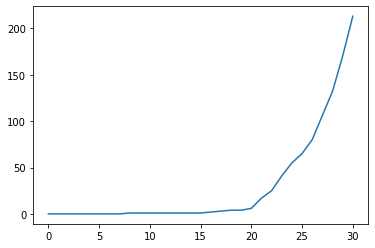

In [3]:
infection.head()
x=infection['Infected']
z=infection['Days']
y=infection['Dead']
y = y.values.reshape(y.shape[0],1)
x = x.values.reshape(x.shape[0],1)
z = z.values.reshape(z.shape[0],1)
print(x.shape,y.shape,z.shape)
plt.plot(infection['Days'],infection['Dead'], markersize=4)

In [4]:
y

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  2],
       [  3],
       [  4],
       [  4],
       [  6],
       [ 17],
       [ 25],
       [ 41],
       [ 55],
       [ 65],
       [ 80],
       [106],
       [132],
       [170],
       [213]])

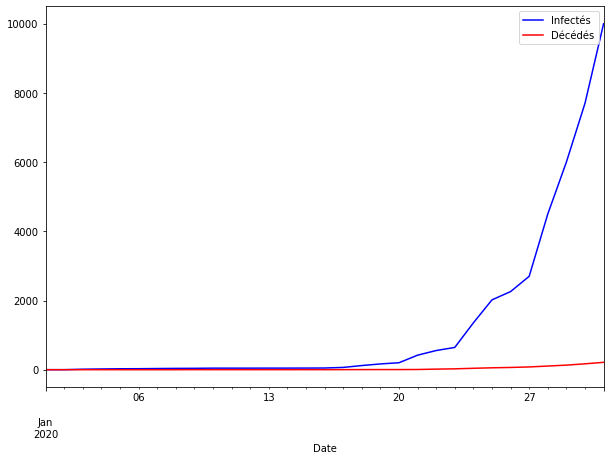

In [5]:
plt.figure(figsize=(10,7))
infection['Infected'].plot(label="Infectés",color='blue')
infection['Dead'].plot(label="Décédés",color='red')
plt.legend()

In [6]:
#X.shape, y.shape #,Z.shape

In [7]:
Z = np.hstack((z,np.ones(z.shape)))
Z= np.hstack((z**2,Z))
#X
#Y = np.hstack((y,np.ones(z.shape)))
Z

array([[  0.,   0.,   1.],
       [  1.,   1.,   1.],
       [  4.,   2.,   1.],
       [  9.,   3.,   1.],
       [ 16.,   4.,   1.],
       [ 25.,   5.,   1.],
       [ 36.,   6.,   1.],
       [ 49.,   7.,   1.],
       [ 64.,   8.,   1.],
       [ 81.,   9.,   1.],
       [100.,  10.,   1.],
       [121.,  11.,   1.],
       [144.,  12.,   1.],
       [169.,  13.,   1.],
       [196.,  14.,   1.],
       [225.,  15.,   1.],
       [256.,  16.,   1.],
       [289.,  17.,   1.],
       [324.,  18.,   1.],
       [361.,  19.,   1.],
       [400.,  20.,   1.],
       [441.,  21.,   1.],
       [484.,  22.,   1.],
       [529.,  23.,   1.],
       [576.,  24.,   1.],
       [625.,  25.,   1.],
       [676.,  26.,   1.],
       [729.,  27.,   1.],
       [784.,  28.,   1.],
       [841.,  29.,   1.],
       [900.,  30.,   1.]])

In [49]:
theta = np.random.randn(3,1)
theta

array([[0.33392997],
       [1.42615047],
       [0.53240006]])

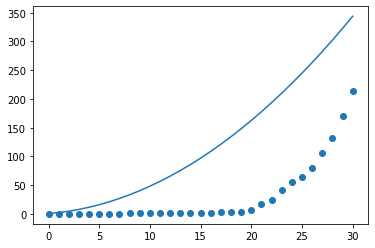

In [50]:
def model(X,theta):
    return X.dot(theta)
plt.scatter(z,y)
plt.plot(z,model(Z,theta))

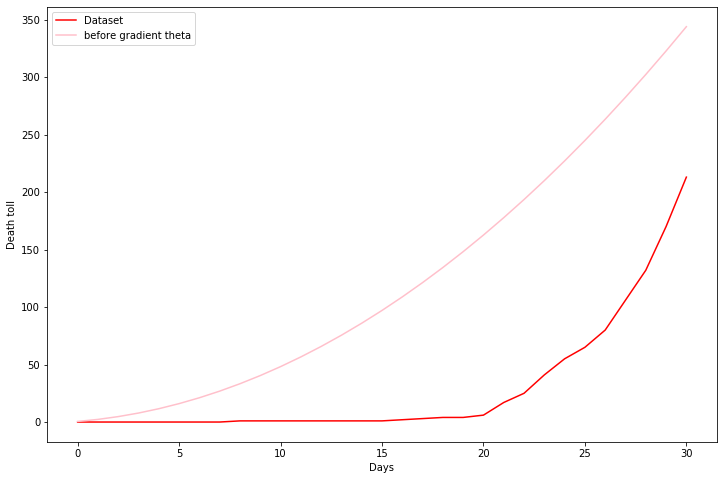

In [51]:
plt.figure(figsize=(12,8))
plt.xlabel('Days')
plt.ylabel('Death toll')
plt.plot(z,y, c='red', label='Dataset')

plt.plot(z,model(Z,theta), c='pink',label='before gradient theta')
plt.legend()

In [52]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [53]:
print(cost_function(Z,y,theta))

6491.193963031196


In [54]:
def grad(X,y,theta):
    m = len(y)
    return 1/m*X.T.dot(model(X,theta)- y)

In [55]:
print(grad(Z,y,theta))

[[44639.59783954]
 [ 1959.34921139]
 [   93.74103859]]


In [56]:
def gradient_descent(X,y,theta, learningRate,n_iterations):
    theta_history = np.zeros((n_iterations,3))
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learningRate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        theta_history[i,:]=theta.T
    return theta, cost_history,theta_history

In [165]:
learning_rate = 0.00001
n_iterations=1000
theta_final, cost_history, theta_history = gradient_descent(Z,y,theta,learning_rate,n_iterations)

In [166]:
print(theta_final)
print(theta_history.shape)

[[0.1202033 ]
 [0.24397218]
 [0.41051339]]
(1000, 3)


In [167]:
prediction=model(Z,theta_final)

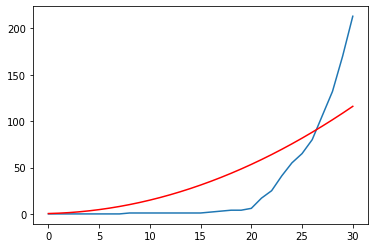

In [168]:
plt.plot(z,y)
plt.plot(z,prediction,color='r')

In [169]:
testpred = theta_final.item(0)*(21**2)+theta_final.item(1)*21+theta_final.item(2) # Number of death= theta(1)*nb of days + theta(0)
testpred

58.54358665795585

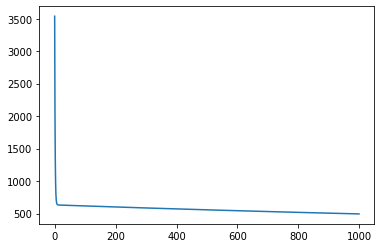

In [171]:
plt.plot(range(n_iterations),cost_history)

In [172]:
def coef_deter(y,pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1 - u/v

In [173]:
coef_deter(y,prediction) # Not linear problem 0.45 

0.6645257839626919